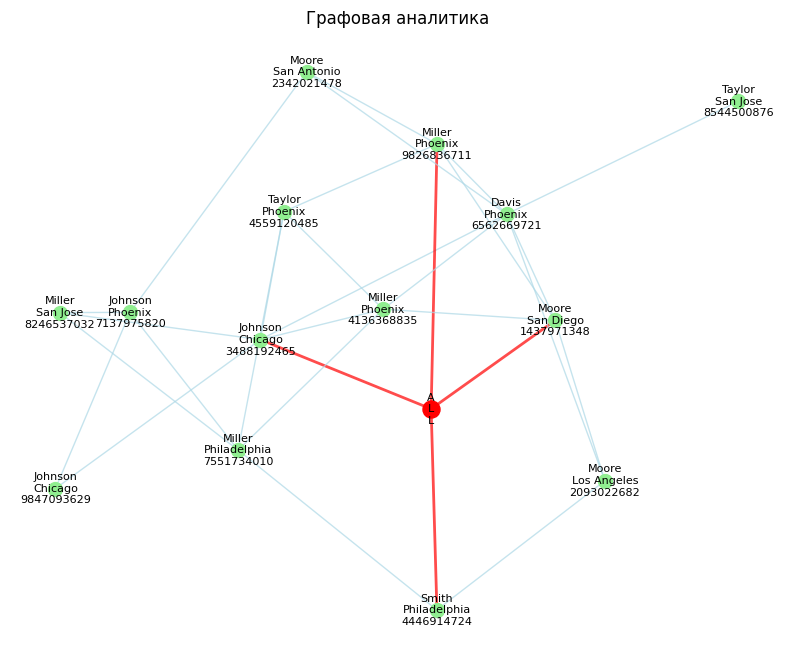

In [64]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import string  # Импорт модуля string

# Списки настоящих фамилий и городов
surnames = ["Smith", "Johnson", "Williams", "Jones", "Brown", "Davis", "Miller", "Wilson", "Moore", "Taylor"]
cities = ["New York", "Los Angeles", "Chicago", "Houston", "Phoenix", "Philadelphia", "San Antonio", "San Diego", "Dallas", "San Jose"]

# Создание графа
G = nx.Graph()

# Добавление 15 вершин
num_nodes = 15
G.add_nodes_from(range(1, num_nodes + 1))

# Добавление случайных связей между вершинами
for i in range(1, num_nodes + 1):
    for _ in range(random.randint(1, 5)):  # Случайное количество связей от 1 до 5
        neighbor = random.randint(1, num_nodes)
        if neighbor != i:
            G.add_edge(i, neighbor)

# Определение важной вершины
important_node = random.randint(1, num_nodes)

# Генерация информации о вершинах (фамилии, города и номера счетов)
nodes_info = {}
for node in G.nodes():
    if node == important_node:
        nodes_info[node] = "ALL"
    else:
        # Случайный выбор фамилии, города и генерация случайного номера счета
        name = random.choice(surnames)
        city = random.choice(cities)
        account_number = ''.join(random.choices(string.digits, k=10))  # Генерация 10-значного случайного числа
        nodes_info[node] = (name, city, account_number)

# Получение путей от важной вершины ко всем другим вершинам
paths = nx.single_source_shortest_path(G, important_node)

# Рисование графа
plt.figure(figsize=(10, 8))

# Определение позиций вершин
pos = nx.spring_layout(G)

# Рисование связей между вершинами
for edge in G.edges():
    if important_node in edge:
        nx.draw_networkx_edges(G, pos, edgelist=[edge], width=2.0, alpha=0.7, edge_color='red')
    else:
        nx.draw_networkx_edges(G, pos, edgelist=[edge], width=1.0, alpha=0.7, edge_color='lightblue')

# Рисование вершин и добавление информации о фамилии, городе и номере счета
for node, info in nodes_info.items():
    if node == important_node:
        nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color='red', node_size=150)
    else:
        nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color='lightgreen', node_size=100)
    nx.draw_networkx_labels(G, pos, {node: f"{info[0]}\n{info[1]}\n{info[2]}"}, font_size=8, font_color='black')

# Отображение графа
plt.title("Графовая аналитика")
plt.axis('off')
plt.show()
